In [1]:
spark

In [2]:
infile = '/home/cloudera/2.kkbox_churn/raw_data/transactions.csv'
df0 = spark.read.format('csv').option('header', 'true').load(infile)
df0.printSchema()

root
 |-- msno: string (nullable = true)
 |-- payment_method_id: string (nullable = true)
 |-- payment_plan_days: string (nullable = true)
 |-- plan_list_price: string (nullable = true)
 |-- actual_amount_paid: string (nullable = true)
 |-- is_auto_renew: string (nullable = true)
 |-- transaction_date: string (nullable = true)
 |-- membership_expire_date: string (nullable = true)
 |-- is_cancel: string (nullable = true)



In [3]:
df0.show(3)

+--------------------+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+
|                msno|payment_method_id|payment_plan_days|plan_list_price|actual_amount_paid|is_auto_renew|transaction_date|membership_expire_date|is_cancel|
+--------------------+-----------------+-----------------+---------------+------------------+-------------+----------------+----------------------+---------+
|YyO+tlZtAXYXoZhNr...|               41|               30|            129|               129|            1|        20150930|              20151101|        0|
|AZtu6Wl0gPojrEQYB...|               41|               30|            149|               149|            1|        20150930|              20151031|        0|
|UkDFI97Qb6+s2LWci...|               41|               30|            129|               129|            1|        20150930|              20160427|        0|
+--------------------+-----------------+------------

In [4]:
df1 = df0.selectExpr("msno", 
                     "plan_list_price AS list_price",
                     "actual_amount_paid AS actual_paid",
                     "CAST(payment_plan_days AS int) AS plan_days", 
                     "CAST(transaction_date AS int) AS trans_date", 
                     "CAST(membership_expire_date AS int) AS exp_date", 
                     "CAST(is_auto_renew AS int)",
                     "CAST(is_cancel AS int)")
df1.printSchema()

root
 |-- msno: string (nullable = true)
 |-- list_price: string (nullable = true)
 |-- actual_paid: string (nullable = true)
 |-- plan_days: integer (nullable = true)
 |-- trans_date: integer (nullable = true)
 |-- exp_date: integer (nullable = true)
 |-- is_auto_renew: integer (nullable = true)
 |-- is_cancel: integer (nullable = true)



In [5]:
df1.show(3)

+--------------------+----------+-----------+---------+----------+--------+-------------+---------+
|                msno|list_price|actual_paid|plan_days|trans_date|exp_date|is_auto_renew|is_cancel|
+--------------------+----------+-----------+---------+----------+--------+-------------+---------+
|YyO+tlZtAXYXoZhNr...|       129|        129|       30|  20150930|20151101|            1|        0|
|AZtu6Wl0gPojrEQYB...|       149|        149|       30|  20150930|20151031|            1|        0|
|UkDFI97Qb6+s2LWci...|       129|        129|       30|  20150930|20160427|            1|        0|
+--------------------+----------+-----------+---------+----------+--------+-------------+---------+
only showing top 3 rows



In [17]:
Nrec = df1.count()
Nrec

21547746

# latest transaction date

In [6]:
from pyspark.sql.functions import max
df1.select(max('trans_date')).show()

+---------------+
|max(trans_date)|
+---------------+
|       20170228|
+---------------+



# latest expiration date of each memeber

In [15]:
from pyspark.sql.functions import max
df2 = df1.groupBy('msno').agg(max('exp_date').alias('latest_exp'))
df2.printSchema()

root
 |-- msno: string (nullable = true)
 |-- latest_exp: integer (nullable = true)



In [16]:
df2.persist()
df2.show(20)

+--------------------+----------+
|                msno|latest_exp|
+--------------------+----------+
|DQH8jGMrXq1FgWyr+...|  20170331|
|jENtJsb8LoDxqKMpG...|  20170331|
|5F7G3pHKf5ijGQpoK...|  20170310|
|+lGirNJNPcYXRMlp6...|  20170310|
|m4Wf4EZuJJODjisMW...|  20170315|
|Dys6cB0GDMSh1oPYC...|  20170322|
|H9q5fhYo6VRVqGDxw...|  20170215|
|vLWK0Uz77Xur1jCTS...|  20170201|
|N9m9JRqpBcNfMR3U6...|  20170305|
|G7EonoojBt01uBPDI...|  20170322|
|2+BjzPtI4IIyT5Aps...|  20170211|
|H2VLk87DarA0D2UDz...|  20160825|
|/RfYY0Hh3T2cmLXFz...|  20160311|
|6Wc6P95WneLKUV0Mi...|  20170302|
|AUvj50Xq+//yzobfk...|  20170331|
|QR+V2ynXUCz38c8ei...|  20170331|
|RbLl0ZBEftSRfSSZ6...|  20170330|
|2XST0lzkGU144x+Vk...|  20170308|
|3A/Eh1IrJ7j3P3OMs...|  20170314|
|jgoikNa9SXrvpPPoo...|  20170304|
+--------------------+----------+
only showing top 20 rows



In [17]:
df2.count()

2363626

In [20]:
from pyspark.sql.functions import col, floor
df3 = df2.select(floor(col('latest_exp')/100).alias('latest_exp_month')) \
         .groupBy('latest_exp_month').count().sort('latest_exp_month')
df3.show(50)

+----------------+------+
|latest_exp_month| count|
+----------------+------+
|          197001|   679|
|          201003|     2|
|          201207|     1|
|          201209|     1|
|          201211|     3|
|          201212|     1|
|          201306|     1|
|          201309|     1|
|          201406|     1|
|          201409|     1|
|          201410|    13|
|          201411|    10|
|          201412|   233|
|          201501|  8394|
|          201502| 13823|
|          201503| 13412|
|          201504| 15285|
|          201505| 19350|
|          201506|151129|
|          201507| 19896|
|          201508| 25437|
|          201509| 32193|
|          201510| 37345|
|          201511| 43100|
|          201512| 55127|
|          201601| 62550|
|          201602| 41315|
|          201603| 57500|
|          201604| 40181|
|          201605| 37486|
|          201606| 36347|
|          201607| 49767|
|          201608| 36260|
|          201609| 81160|
|          201610| 69526|
|          2

# auto renewal 

In [10]:
from pyspark.sql.functions import col, sum, count
df2 = df1.where('is_cancel = 0') \
         .groupBy('msno').agg(count('msno').alias('count'), sum('is_auto_renew').alias('count_auto_renew'))
df2.printSchema()

root
 |-- msno: string (nullable = true)
 |-- count: long (nullable = false)
 |-- count_auto_renew: long (nullable = true)



In [11]:
df2.persist()
df2.show(10)

+--------------------+-----+----------------+
|                msno|count|count_auto_renew|
+--------------------+-----+----------------+
|DQH8jGMrXq1FgWyr+...|   22|              22|
|jENtJsb8LoDxqKMpG...|   22|              22|
|5F7G3pHKf5ijGQpoK...|   17|              17|
|+lGirNJNPcYXRMlp6...|   14|              14|
|m4Wf4EZuJJODjisMW...|   12|               0|
|Dys6cB0GDMSh1oPYC...|   12|              12|
|H9q5fhYo6VRVqGDxw...|    8|               0|
|vLWK0Uz77Xur1jCTS...|   16|              16|
|N9m9JRqpBcNfMR3U6...|   24|              18|
|G7EonoojBt01uBPDI...|   26|              26|
+--------------------+-----+----------------+
only showing top 10 rows



In [20]:
n0 = df2.count()
print('# members:', n0)

# members: 2347326


In [23]:
n = df2.where('count = count_auto_renew').count()
print('# members using only auto renewal:', n)
print('({} %)'.format(n/n0*100))

# members using only auto renewal: 1291499
(55.02001000287136 %)


In [24]:
n = df2.where('count_auto_renew = 0').count()
print('# members who never used auto renewal:', n)
print('({} %)'.format(n/n0*100))

# members who never used auto renewal: 887626
(37.81434704851392 %)


In [17]:
df3 = df2.where('count != count_auto_renew').where('count_auto_renew != 0')
print('# members who used auto renewal for some (but not all) transactions:', df3.count())

# members who used auto renewal for some (but not all) transactions: 168201


In [25]:
df3.show(5)

+--------------------+-----+----------------+
|                msno|count|count_auto_renew|
+--------------------+-----+----------------+
|N9m9JRqpBcNfMR3U6...|   24|              18|
|lDDRMgYYYlDPkwtLN...|   26|              25|
|VbCNHUZZoCRjoCu3y...|    6|               4|
|T92xj92xZjD3k41Vu...|    9|               8|
|ZuSBcMwwCpezmsm2L...|   26|              25|
+--------------------+-----+----------------+
only showing top 5 rows



In [34]:
from pyspark.sql.functions import col, floor
df4 = df3.select('msno', 
                 (col('count_auto_renew')/col('count')).alias('auto_renew_ratio'),
                 floor(col('count_auto_renew')/col('count')*10).alias('auto_renew_ratio_bin'))

In [35]:
df4.show(5)

+--------------------+------------------+--------------------+
|                msno|  auto_renew_ratio|auto_renew_ratio_bin|
+--------------------+------------------+--------------------+
|N9m9JRqpBcNfMR3U6...|              0.75|                   7|
|lDDRMgYYYlDPkwtLN...|0.9615384615384616|                   9|
|VbCNHUZZoCRjoCu3y...|0.6666666666666666|                   6|
|T92xj92xZjD3k41Vu...|0.8888888888888888|                   8|
|ZuSBcMwwCpezmsm2L...|0.9615384615384616|                   9|
+--------------------+------------------+--------------------+
only showing top 5 rows



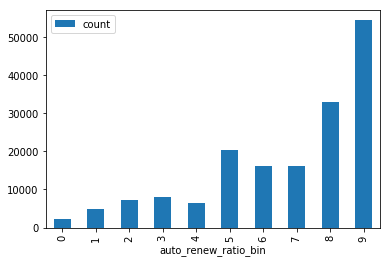

In [44]:
import matplotlib.pyplot as plt
df4.select('auto_renew_ratio_bin') \
   .groupBy('auto_renew_ratio_bin').count().sort('auto_renew_ratio_bin') \
   .toPandas().set_index('auto_renew_ratio_bin').plot(kind='bar')

## auto renewal vs. plan_days after 2015/11/01

In [68]:
df2 = df1.where('trans_date >= 20151101') \
         .where('plan_days != 0 OR is_cancel = 1') \
         .where('is_auto_renew = 1')
      # the 2nd filter is to filter out a few useless records with plan_days = 0
df2.count()

12706915

In [69]:
df2.show(3)

+--------------------+---------+----------+--------+-------------+---------+
|                msno|plan_days|trans_date|exp_date|is_auto_renew|is_cancel|
+--------------------+---------+----------+--------+-------------+---------+
|FT4moGxOj6tzwkTSA...|       30|  20151130|20151231|            1|        0|
|z1s1E/gm6xiwjNb8T...|       30|  20151130|20151231|            1|        0|
|lZyYiuAJW3qzDnicN...|       30|  20151130|20151231|            1|        0|
+--------------------+---------+----------+--------+-------------+---------+
only showing top 3 rows



In [70]:
df2.groupBy('plan_days').count().show(20)

+---------+--------+
|plan_days|   count|
+---------+--------+
|       30|12706915|
+---------+--------+



* All records with `is_auto_renew` = 1 and `trans_date` >= 2015/11/01 have `plan_days` = 30 (except possibly for a few records with `plan_days` = 0)

# plan_days = 0

In [21]:
n = df1.where('plan_days = 0').count()
print('# records with plan_days=0:', n)
print('({} %)'.format(n/Nrec*100))

# records with plan_days=0: 870124
(4.038120738939469 %)


In [29]:
from pyspark.sql.functions import col, floor
df2 = df1.where('plan_days = 0') \
         .select(floor(col('trans_date')/100).alias('trans_month'))

df2.show(3)

+-----------+
|trans_month|
+-----------+
|     201509|
|     201509|
|     201509|
+-----------+
only showing top 3 rows



In [30]:
df3 = df2.groupBy('trans_month').count()
df3.persist()
df3.show(10)

+-----------+------+
|trans_month| count|
+-----------+------+
|     201503| 72879|
|     201611|     1|
|     201510| 70065|
|     201609|     1|
|     201601|     1|
|     201505|247469|
|     201509| 70667|
|     201512|     2|
|     201504|193855|
|     201506| 72309|
+-----------+------+
only showing top 10 rows



In [38]:
df3.sort('trans_month') \
   .withColumnRenamed('count', 'count__plan_days_eq_0').show(20)

+-----------+---------------------+
|trans_month|count__plan_days_eq_0|
+-----------+---------------------+
|     201503|                72879|
|     201504|               193855|
|     201505|               247469|
|     201506|                72309|
|     201507|                71755|
|     201508|                71119|
|     201509|                70667|
|     201510|                70065|
|     201512|                    2|
|     201601|                    1|
|     201609|                    1|
|     201611|                    1|
|     201701|                    1|
+-----------+---------------------+



* Almost all of the records with `plan_days`=0 have `trans_date`<20151101.

## plan_days = 0 after 2015/11/01 

In [43]:
from pyspark.sql.functions import col, floor
df2 = df1.where('plan_days = 0') \
         .where('trans_date >= 20151101').persist()

In [45]:
df2.show(truncate=False)

# These are the records with plan_days = 0 and trans_date >= 2015/11/01:

+--------------------------------------------+---------+----------+--------+-------------+---------+
|msno                                        |plan_days|trans_date|exp_date|is_auto_renew|is_cancel|
+--------------------------------------------+---------+----------+--------+-------------+---------+
|/Nel+muc1PTxTHDepUcmRRBezg0dwZ96pTkLV91ojZo=|0        |20170116  |20170111|0            |1        |
|yoFSlNP8/d9hoeWusC3OUZMPJLzIOIqaQ53ALlTntf0=|0        |20151223  |20100325|0            |0        |
|YK0mAbVp4I452/awLmy3zqUkO5MoQ+StcsDB1F8nYY4=|0        |20160121  |20160120|0            |1        |
|dS2WKDR7me3ESNLkoIHA3cuArCWNgiC+fhwbvUt7eY4=|0        |20151202  |20100325|0            |0        |
|tGPeF1ZQnR0G8F7cuHvmhkBvnzXFx5eRQ4dV/kY3CfY=|0        |20160920  |20160913|0            |1        |
|bXVpyDYBw/e4k92ZGy8/QGsYPHACPOY3Vs7MT0FF1QA=|0        |20161128  |20161115|0            |1        |
+--------------------------------------------+---------+----------+--------+-------------+-

In [54]:
df3 = df2.select('msno').withColumnRenamed('msno', 'msno_')
df4 = df3.join(df1, df3['msno_'] == df1['msno'], 'inner').persist()
df4.show()  

+--------------------+--------------------+---------+----------+--------+-------------+---------+
|               msno_|                msno|plan_days|trans_date|exp_date|is_auto_renew|is_cancel|
+--------------------+--------------------+---------+----------+--------+-------------+---------+
|/Nel+muc1PTxTHDep...|/Nel+muc1PTxTHDep...|        0|  20170116|20170111|            0|        1|
|yoFSlNP8/d9hoeWus...|yoFSlNP8/d9hoeWus...|        0|  20151223|20100325|            0|        0|
|YK0mAbVp4I452/awL...|YK0mAbVp4I452/awL...|        0|  20160121|20160120|            0|        1|
|dS2WKDR7me3ESNLko...|dS2WKDR7me3ESNLko...|        0|  20151202|20100325|            0|        0|
|tGPeF1ZQnR0G8F7cu...|tGPeF1ZQnR0G8F7cu...|        0|  20160920|20160913|            0|        1|
|YK0mAbVp4I452/awL...|YK0mAbVp4I452/awL...|        0|  20150308|20150308|            0|        1|
|YK0mAbVp4I452/awL...|YK0mAbVp4I452/awL...|        0|  20150316|20100325|            0|        0|
|bXVpyDYBw/e4k92ZG..

In [57]:
df4.drop('msno_').orderBy('msno', 'trans_date').show(truncate=False)

+--------------------------------------------+---------+----------+--------+-------------+---------+
|msno                                        |plan_days|trans_date|exp_date|is_auto_renew|is_cancel|
+--------------------------------------------+---------+----------+--------+-------------+---------+
|/Nel+muc1PTxTHDepUcmRRBezg0dwZ96pTkLV91ojZo=|0        |20170116  |20170111|0            |1        |
|YK0mAbVp4I452/awLmy3zqUkO5MoQ+StcsDB1F8nYY4=|0        |20150308  |20150308|0            |1        |
|YK0mAbVp4I452/awLmy3zqUkO5MoQ+StcsDB1F8nYY4=|0        |20150316  |20100325|0            |0        |
|YK0mAbVp4I452/awLmy3zqUkO5MoQ+StcsDB1F8nYY4=|0        |20160121  |20160120|0            |1        |
|bXVpyDYBw/e4k92ZGy8/QGsYPHACPOY3Vs7MT0FF1QA=|0        |20161128  |20161115|0            |1        |
|dS2WKDR7me3ESNLkoIHA3cuArCWNgiC+fhwbvUt7eY4=|0        |20151202  |20100325|0            |0        |
|tGPeF1ZQnR0G8F7cuHvmhkBvnzXFx5eRQ4dV/kY3CfY=|0        |20160920  |20160913|0            |1

## plan_days = 30 vs. is_auto_renew 

In [86]:
df1_clean = df1.where('trans_date >= 20151101') \
               .where('plan_days != 0 OR is_cancel = 1') \
               .where('is_cancel = 0 OR is_auto_renew = 1')

In [88]:
df2 = df1_clean.where('plan_days = 30') \
               .select('is_auto_renew')
df2.groupBy('is_auto_renew').count().show()

+-------------+--------+
|is_auto_renew|   count|
+-------------+--------+
|            1|12706915|
|            0| 1502716|
+-------------+--------+



# is_cancel = 1

In [7]:
df1.printSchema()

root
 |-- msno: string (nullable = true)
 |-- plan_days: integer (nullable = true)
 |-- trans_date: integer (nullable = true)
 |-- exp_date: integer (nullable = true)
 |-- is_auto_renew: integer (nullable = true)
 |-- is_cancel: integer (nullable = true)



In [59]:
df2 = df1.where('is_cancel = 1') \
         .where('trans_date >= 20151101') \
         .select('plan_days')

df2.show(3)

+---------+
|plan_days|
+---------+
|       30|
|       30|
|       30|
+---------+
only showing top 3 rows



In [60]:
df2.groupBy('plan_days').count().show(10)

# is_cancel = 1 and trans_date >= 2015/11/01:

+---------+------+
|plan_days| count|
+---------+------+
|       30|575854|
|        0|     4|
+---------+------+



* Almost all records with `is_cancel` = 1 and `trans_date` >= 2015/11/01 has `plan_days` = 30.

## is_cancel = 1 vs. auto_renew 

In [71]:
df2 = df1.where('trans_date >= 20151101') \
         .where('plan_days != 0 OR is_cancel = 1') \
         .where('is_cancel = 1')
df2.show(3)

+--------------------+---------+----------+--------+-------------+---------+
|                msno|plan_days|trans_date|exp_date|is_auto_renew|is_cancel|
+--------------------+---------+----------+--------+-------------+---------+
|6Z94vibpV9J+tcf8R...|       30|  20151202|20151202|            1|        1|
|Xik55GiZKTkU1fMHN...|       30|  20160225|20160224|            1|        1|
|Hvi7rtyChpu+y/sxl...|       30|  20160225|20160225|            1|        1|
+--------------------+---------+----------+--------+-------------+---------+
only showing top 3 rows



In [79]:
df3 = df2.where('is_auto_renew != 1')
df3.show(truncate=False)

# is_cancel but not is_auto_renew:

+--------------------------------------------+---------+----------+--------+-------------+---------+
|msno                                        |plan_days|trans_date|exp_date|is_auto_renew|is_cancel|
+--------------------------------------------+---------+----------+--------+-------------+---------+
|/Nel+muc1PTxTHDepUcmRRBezg0dwZ96pTkLV91ojZo=|0        |20170116  |20170111|0            |1        |
|YK0mAbVp4I452/awLmy3zqUkO5MoQ+StcsDB1F8nYY4=|0        |20160121  |20160120|0            |1        |
|tGPeF1ZQnR0G8F7cuHvmhkBvnzXFx5eRQ4dV/kY3CfY=|0        |20160920  |20160913|0            |1        |
|bXVpyDYBw/e4k92ZGy8/QGsYPHACPOY3Vs7MT0FF1QA=|0        |20161128  |20161115|0            |1        |
+--------------------------------------------+---------+----------+--------+-------------+---------+



In [81]:
df4 = df3.selectExpr('msno AS msno_')
df5 = df4.join(df1, df4['msno_'] == df1['msno'], 'inner').persist()

In [83]:
df5.drop('msno_').orderBy('msno', 'trans_date').show(40, truncate=False)

+--------------------------------------------+---------+----------+--------+-------------+---------+
|msno                                        |plan_days|trans_date|exp_date|is_auto_renew|is_cancel|
+--------------------------------------------+---------+----------+--------+-------------+---------+
|/Nel+muc1PTxTHDepUcmRRBezg0dwZ96pTkLV91ojZo=|0        |20170116  |20170111|0            |1        |
|YK0mAbVp4I452/awLmy3zqUkO5MoQ+StcsDB1F8nYY4=|0        |20150308  |20150308|0            |1        |
|YK0mAbVp4I452/awLmy3zqUkO5MoQ+StcsDB1F8nYY4=|0        |20150316  |20100325|0            |0        |
|YK0mAbVp4I452/awLmy3zqUkO5MoQ+StcsDB1F8nYY4=|0        |20160121  |20160120|0            |1        |
|bXVpyDYBw/e4k92ZGy8/QGsYPHACPOY3Vs7MT0FF1QA=|0        |20161128  |20161115|0            |1        |
|tGPeF1ZQnR0G8F7cuHvmhkBvnzXFx5eRQ4dV/kY3CfY=|0        |20160920  |20160913|0            |1        |
+--------------------------------------------+---------+----------+--------+-------------+-

# conclusion
* data cleaning:

In [ ]:
df1 = df0.selectExpr("msno", 
                     "CAST(payment_plan_days AS int) AS plan_days", 
                     "CAST(transaction_date AS int) AS trans_date", 
                     "CAST(membership_expire_date AS int) AS exp_date", 
                     "CAST(is_auto_renew AS int)",
                     "CAST(is_cancel AS int)")

df1_clean = df1.where('trans_date >= 20151101') \
               .where('plan_days != 0 OR is_cancel = 1') \
               .where('is_cancel = 0 OR is_auto_renew = 1')

* is_cancel $\implies$ auto_renew $\implies$ plan_days=30
* number of records with plan_days=30: 14210K
* number of records with is_auto_renew=1: 12707K
* number of records with is_cancel=1: 576K